In [1]:
#import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import contextily as cx
from shapely.geometry import box
import sys
from datetime import datetime, timedelta
from itertools import chain

from datetime import date


sys.path.insert(0, '/projects/old_shared/fire_weather_vis/base-fwi-vis/')
import fwiVis.fwiVis as fv

## NOTE: I needed to update rioxarray

# mamba install rioxarray -c conda-forge

In [2]:
import imgkit

import contextily as cx


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:507: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:508: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


Text(0.5, 1.0, '2023-07-10')

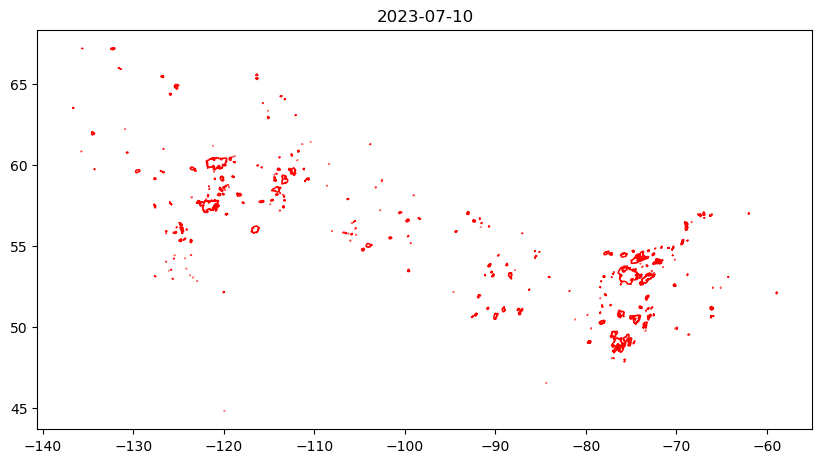

In [7]:
### Reading in snapshot file data

snap = fv.prep_gdf(date = '20230710AM',layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "BOREAL_NRT_3571_DPS", crs ='EPSG:4326' )


ax = snap.plot(figsize=(10, 10), facecolor="none", edgecolor="red")
# cx.add_basemap(ax,
#                 crs="3571", #)#, 
#                 source= "https://map1.vis.earthdata.nasa.gov/wmts-webmerc/MODIS_Terra_CorrectedReflectance_TrueColor/default/2023-06-06/GoogleMapsCompatible_Level9/{z}/{y}/{x}.jpg")
#                 #crs=gdf.crs.to_string(), source=cx.providers.NASAGIBS.ModisTerraBands367CR) #  zoom = 10
ax.set_title(str(*snap.t.astype('str').unique()))
# ax.set_xlim(-83, -61)
# ax.set_ylim(45, 55)

#gdf.t

In [6]:
### Get stuff in snapshot file format

## May 29th - June 8th
date_range = pd.date_range(start = "2023-05-30 12:00:00", end = "2023-06-06 00:00:00", freq="12H")
#date_range_format = datetime.strptime(date_rage, 
date_snap = date_range.strftime("%Y%m%d%p")
date_snap
nice_dates = date_range.strftime("%Y-%m-%d %p")

In [7]:
snap.crs.to_string()

'EPSG:3571'

20230530PM


CRSError: The WKT could not be parsed. OGR Error code 5

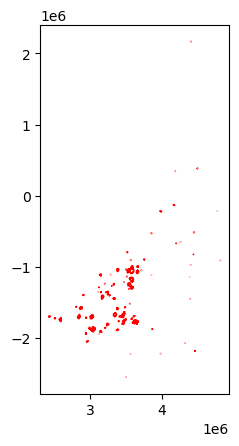

In [9]:
for d,n in zip(date_snap,nice_dates) :
    print(d)
    snap = fv.prep_gdf(date = d,layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "BOREAL_NRT_3571_DPS", crs ='epsg:3571')
    plt.figure()
    # create subplot axes in a 3x3 grid
    ax = plt.subplot() # nrows, ncols, axes position
    # plot the continent on these axes
    plot = snap.plot(ax = ax, figsize=(45, 45), facecolor="none", edgecolor="red")
    #ax.set_extent([-83, -61, 45, 55], crs=gdf.crs.to_string())
    #plot.set_xlim(-83, -61)
    #plot.set_ylim(45, 55)
    cx.add_basemap(plot, crs="3571", attribution = False, source=cx.providers.NASAGIBS.ViirsTrueColorCR) #source=cx.providers.NASAGIBS.ModisTerraTrueColorCR
    #txt = ax.texts[-1]
    #txt.set_position([0.99,0.98])
    #txt.set_ha('right')
    #txt.set_va('top')
    # set the title
    #timestamp = snap.t.astype('datetime64[ns]')
    ax.set_title(n)
    #plt.savefig('/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/quebec/openstreet_quebec_snap_' + d +'.png', dpi=400)
    plt.show()
    